In [1]:
#Set up and data load
import os
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

import statsmodels.formula.api as smf
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor

sns.set_context("talk")


In [2]:
analysis_df = pd.read_csv("../data/processed/analysis_dataset.csv")

analysis_df = analysis_df.dropna(
    subset=["female_share_management", "leave_policy_strength", "year"]
)

analysis_df.head(), analysis_df.shape


(  country_code                             country_x  year  \
 0          AFG  {'id': 'AF', 'value': 'Afghanistan'}  2020   
 1          AFG  {'id': 'AF', 'value': 'Afghanistan'}  2017   
 2          AFG  {'id': 'AF', 'value': 'Afghanistan'}  2014   
 3          ALB      {'id': 'AL', 'value': 'Albania'}  2023   
 4          ALB      {'id': 'AL', 'value': 'Albania'}  2022   
 
    female_share_management    country_y  maternity_leave_days  \
 0                    5.889  Afghanistan                  90.0   
 1                    4.255  Afghanistan                  90.0   
 2                    6.928  Afghanistan                  90.0   
 3                   32.382      Albania                 365.0   
 4                   29.107      Albania                 365.0   
 
    paternity_leave_days  shared_parental_leave_days  \
 0                  14.0                         0.0   
 1                  14.0                         0.0   
 2                  14.0                         0.0  

In [3]:
model = smf.ols(
    "female_share_management ~ leave_policy_strength + C(year)",
    data=analysis_df
).fit(cov_type="HC3")

model.summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                               OLS Regression Results                              
===================================================================================
Dep. Variable:     female_share_management   R-squared:                       0.050
Model:                                 OLS   Adj. R-squared:                  0.036
Method:                      Least Squares   F-statistic:                     4.434
Date:                     Wed, 17 Dec 2025   Prob (F-statistic):           6.80e-12
Time:                             15:03:45   Log-Likelihood:                -6112.1
No. Observations:                     1650   AIC:                         1.227e+04
Df Residuals:                         1625   BIC:                         1.241e+04
Df Model:                               24                                         
Covariance Type:                       HC3                                         
=========================================================================================
                            coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------
Intercept                25.7293      1.294     19.882      0.000      23.193      28.266
C(year)[T.2001]          -0.6396      1.916     -0.334      0.738      -4.394       3.115
C(year)[T.2002]           0.4271      1.796      0.238      0.812      -3.093       3.947
C(year)[T.2003]           2.4041      1.786      1.346      0.178      -1.097       5.906
C(year)[T.2004]           1.7500      1.881      0.930      0.352      -1.938       5.438
C(year)[T.2005]           1.6873      1.866      0.904      0.366      -1.970       5.344
C(year)[T.2006]           1.2786      1.792      0.714      0.475      -2.233       4.791
C(year)[T.2007]           1.2259      1.742      0.704      0.482      -2.189       4.641
C(year)[T.2008]           3.7905      1.805      2.100      0.036       0.254       7.327
C(year)[T.2009]           2.3867      1.814      1.316      0.188      -1.168       5.941
C(year)[T.2010]           1.7745      1.794      0.989      0.323      -1.742       5.291
C(year)[T.2011]           3.7108      1.800      2.062      0.039       0.184       7.238
C(year)[T.2012]           2.9855      1.833      1.628      0.103      -0.608       6.579
C(year)[T.2013]           2.8359      1.721      1.648      0.099      -0.537       6.208
C(year)[T.2014]           2.6191      1.737      1.508      0.132      -0.785       6.023
C(year)[T.2015]           3.1474      1.654      1.903      0.057      -0.094       6.389
C(year)[T.2016]           4.6273      1.672      2.767      0.006       1.350       7.905
C(year)[T.2017]           3.4220      1.729      1.979      0.048       0.034       6.810
C(year)[T.2018]           4.6256      1.627      2.843      0.004       1.437       7.814
C(year)[T.2019]           5.8486      1.628      3.592      0.000       2.657       9.040
C(year)[T.2020]           6.6964      1.676      3.996      0.000       3.412       9.981
C(year)[T.2021]           5.6941      1.635      3.483      0.000       2.490       8.898
C(year)[T.2022]           4.9388      1.620      3.049      0.002       1.765       8.113
C(year)[T.2023]           7.7942      1.601      4.868      0.000       4.656      10.932
leave_policy_strength    13.2241      2.591      5.103      0.000       8.145      18.303
==============================================================================
Omnibus:                       20.706   Durbin-Watson:                   0.433
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               34.627
Skew:                           0.034   Prob(JB):                     3.03e-08
Kurtosis:                       3.706   Cond. No.                         33.1
==============================================================================

Notes:
[1] Standard Errors are he

Residual Diagnostics


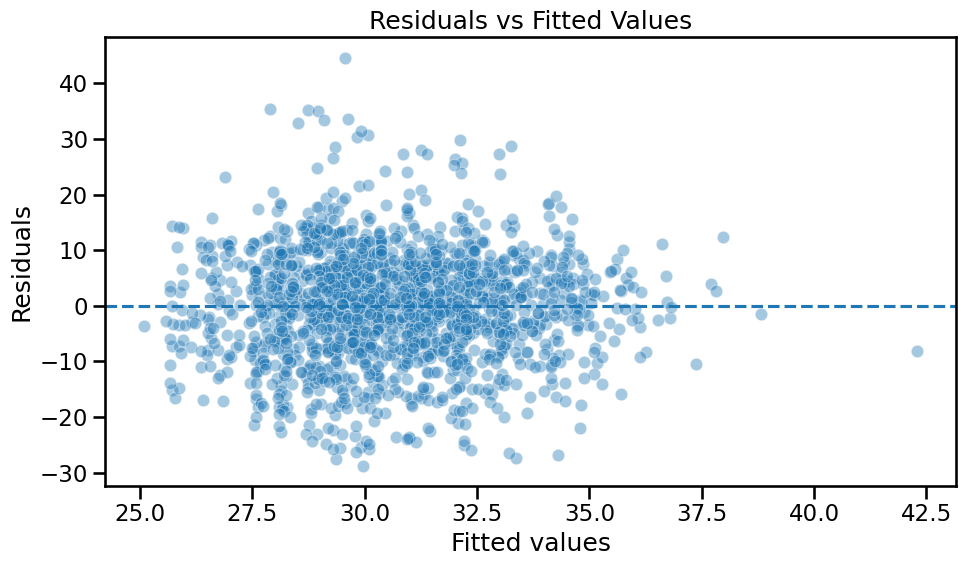

In [4]:
fitted = model.fittedvalues
residuals = model.resid

plt.figure(figsize=(10,6))
sns.scatterplot(x=fitted, y=residuals, alpha=0.4)
plt.axhline(0, linestyle="--")
plt.title("Residuals vs Fitted Values")
plt.xlabel("Fitted values")
plt.ylabel("Residuals")
plt.tight_layout()

plt.savefig("../results/figures/fig5_residuals_vs_fitted.png", dpi=300)
plt.show()


Figure 1. Residuals plotted against fitted values for the primary regression model. The absence of strong patterns supports the linearity assumption and suggests no severe heteroskedasticity.

Normaility Check

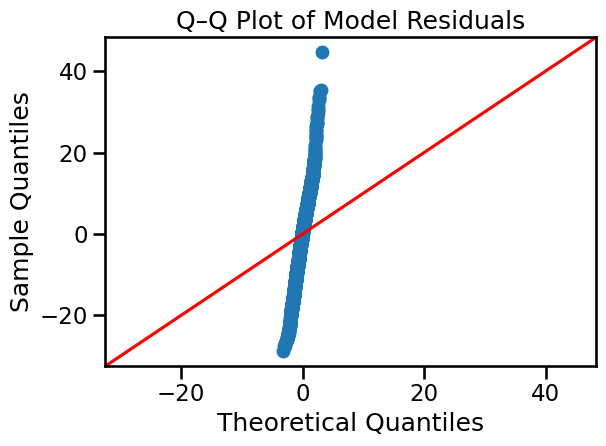

In [5]:
sm.qqplot(residuals, line="45")
plt.title("Q–Q Plot of Model Residuals")
plt.tight_layout()

plt.savefig("../results/figures/fig6_qqplot_residuals.png", dpi=300)
plt.show()


Figure2. Q–Q plot of regression residuals. Residuals generally follow the theoretical normal line, indicating approximate normality, which supports valid inference for coefficient estimates.

In [6]:
#Multicollinearity
vif_df = analysis_df[["leave_policy_strength", "year"]].copy()
vif_df["intercept"] = 1

vif_data = pd.DataFrame({
    "variable": vif_df.columns,
    "VIF": [
        variance_inflation_factor(vif_df.values, i)
        for i in range(vif_df.shape[1])
    ]
})

vif_data



,variable,VIF
0,leave_policy_strength,1.000020
1,year,1.000020
2,intercept,93627.276632


Diagnostic Summary:
Residual diagnostics indicate no major violations of linear regression assumptions. Residuals are approximately centered around zero with no strong nonlinear patterns, and Q–Q plots suggest approximate normality. Variance inflation factor (VIF) values indicate low multicollinearity between the key explanatory variables. Together, these diagnostics support the validity and robustness of the baseline regression results presented in Sprint 3.